## Comparing Influenza and Covid-19 Rates in the United States

## Goals:
The goal of this project is to compare influenza and covid-19 data. Understanding the trends for each respective virus could help us to make more educated decisions in public health regarding quarantine policies, vaccination dates, and how serious both these viruses are to the safety of the public.

## References:
The first file consists of nationwide data of flu season level, and ICU hospitalization rates from years 2015-2022, obtained from the CDC, https://cdc.gov/flu/weekly. 

The second file contains information on nationwide covid-19 cases from week-to-week from years 2020-late 2022, found from https://healthdata.gov/dataset/United-States-COVID-19-Cases-and-Deaths-by-State-o/hiyb-zgc2.

## Goal 1:

The first thing I want to do is read in my data and combine it into a single dataframe. The index of the new dataframe will be a datetime formatted date, grouped by the week of all information. 

After the dataframe is created, the dataframe columns with the total cases for each respective virus will be plotted. Going to use a basic line graph to plot each individual value. Doing this to show the significance in numbers over the years for influenza and covid-19.

In [1]:
## Importing pandas and reading in the data files, one being .csv, and one being .xls
## Setting my pd option to display all columns from dataframes.

import pandas as pd
pd.set_option('display.max_columns', None)

flu = pd.read_csv('Influenza_Surveillance_Weekly.csv')
covid = pd.read_excel('US COVID XSL.xls')

In [2]:
## Taking a peak at the top five rows of flu data.

flu.head()

,MMWR_WEEK,WEEK_START,WEEK_END,FLU_RISK_LEVEL,INFLUENZA_SEASON,HOSP_FLU_ICU_WEEKLY,HOSP_FLU_ICU_CUMULATIVE,LAB_FLU_TESTED,LAB_FLU_POSITIVE,LAB_FLU_PCT_POSITIVE,LAB_TOT_A_POSITIVE,LAB_TOT_B_POSITIVE,LAB_TOT_H1N1_POSITIVE,LAB_TOT_H3N2_POSITIVE,LAB_TOT_NOTSUBTYPED_POSITIVE,LAB_TOT_TESTED_CUMULATIVE,LAB_TOT_POSITIVE_CUMULATIVE,LAB_PCT_POSITIVE_CUMULATIVE,ILI_TOT_ILI_ILINET,ILI_TOT_SEEN_ILINET,ILI_PCT_POSITIVE_ILINET,ILI_TOT_ILI_ESSENCE,ILI_TOT_SEEN_ESSENCE,ILI_PCT_POSITIVE_ESSENCE,PEDIATRIC_DEATHS,RECORD_ID
0,201540,10/04/2015,10/10/2015,LOW,2015-2016,0,0,456,3,0.01,2,1,0,1,1,456,3,0.01,277,7631,0.04,420,23008,0.02,0,2015-40
1,201541,10/11/2015,10/17/2015,LOW,2015-2016,1,1,501,3,0.01,3,0,2,1,0,957,6,0.01,271,6997,0.04,496,24540,0.02,0,2015-41
2,201542,10/18/2015,10/24/2015,LOW,2015-2016,0,1,451,1,0.00,1,0,1,0,0,1408,7,0.00,310,7834,0.04,454,23500,0.02,0,2015-42
3,201543,10/25/2015,10/31/2015,LOW,2015-2016,1,2,507,4,0.01,3,1,1,1,1,1915,11,0.01,271,6755,0.04,355,22499,0.02,0,2015-43
4,201544,11/01/2015,11/07/2015,LOW,2015-2016,1,3,480,2,0.00,2,0,0,0,2,2395,13,0.01,318,7676,0.04,395,24036,0.02,0,2015-44


In [3]:
## Taking a peak at the top five rows of covid data.

covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2021-03-11,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,2021-03-12 15:20:13,Agree,NaN
1,2021-12-01,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,2021-12-02 14:35:20,Agree,Not agree
2,2022-01-02,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,2022-01-03 15:18:16,NaN,NaN
3,2021-11-22,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,2021-11-22 00:00:00,Agree,Agree
4,2022-05-30,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,2022-05-31 13:20:20,NaN,NaN


In [4]:
## Goal is to transform both file data submission dates to a datetime format, by importing the datetime module.
## First transform both start columns to a string, allowing us to transform to a datetime.

from datetime import datetime

flu_start = flu['WEEK_START'].astype(str)
covid_start = covid['submission_date'].astype(str)

flu_dt = pd.to_datetime(flu_start, format='%m/%d/%Y')
covid_dt = pd.to_datetime(covid_start, format='%Y-%m-%d')

In [5]:
## Setting new columns in dataframe that consists of a datetime formatted week date.

flu['Weekly'] = flu_dt
covid['Weekly'] = covid_dt

In [6]:
## Creating a new df using a groupby/Grouper function, both df are seperate, but grouped weekly, with sums for all values.

flu_by_week = flu.groupby([pd.Grouper(key='Weekly', freq='W')]).sum()
covid_by_week = covid.groupby([pd.Grouper(key='Weekly', freq='W')]).sum()

In [7]:
## Merging these df together using 'outer' will get both flu trends and all of our covid data.
## Dropping column 'MMWR_WEEK' as this column has no meaning, or use, with our new weekly grouped data.
## Filling 'NaN' values with zero, as it is not available due to covid-19 not emerging until early 2020.

total = flu_by_week.merge(covid_by_week, how='outer', left_on='Weekly', right_on='Weekly')
total.drop('MMWR_WEEK', axis = 1, inplace = True)
total.fillna(0, inplace = True)
total

,HOSP_FLU_ICU_WEEKLY,HOSP_FLU_ICU_CUMULATIVE,LAB_FLU_TESTED,LAB_FLU_POSITIVE,LAB_FLU_PCT_POSITIVE,LAB_TOT_A_POSITIVE,LAB_TOT_B_POSITIVE,LAB_TOT_H1N1_POSITIVE,LAB_TOT_H3N2_POSITIVE,LAB_TOT_NOTSUBTYPED_POSITIVE,LAB_TOT_TESTED_CUMULATIVE,LAB_TOT_POSITIVE_CUMULATIVE,LAB_PCT_POSITIVE_CUMULATIVE,ILI_TOT_ILI_ILINET,ILI_TOT_SEEN_ILINET,ILI_PCT_POSITIVE_ILINET,ILI_TOT_ILI_ESSENCE,ILI_TOT_SEEN_ESSENCE,ILI_PCT_POSITIVE_ESSENCE,PEDIATRIC_DEATHS,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
Weekly,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-04,0,0,456,3,0.01,2,1,0,1,1,456,3,0.01,277,7631,0.04,420,23008,0.02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-11,1,1,501,3,0.01,3,0,2,1,0,957,6,0.01,271,6997,0.04,496,24540,0.02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-18,0,1,451,1,0.00,1,0,1,0,0,1408,7,0.00,310,7834,0.04,454,23500,0.02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-25,1,2,507,4,0.01,3,1,1,1,1,1915,11,0.01,271,6755,0.04,355,22499,0.02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-01,1,3,480,2,0.00,2,0,0,0,2,2395,13,0.01,318,7676,0.04,395,24036,0.02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-09,0,1,4552,35,0.01,35,0,2,10,23,8537,65,0.01,117,5580,0.02,446,22647,0.02,0,182528698.0,75626689.0,20740795.0,79144.0,18174.0,2079034.0,794468.0,144860.0,797.0,152.0
2022-10-16,0,1,4922,108,0.02,107,1,3,20,84,13459,173,0.01,134,5434,0.02,474,22920,0.02,0,221106117.0,88371177.0,25883505.0,88649.0,24185.0,2558562.0,1028667.0,172831.0,761.0,157.0
2022-10-23,3,4,5195,212,0.04,208,4,7,40,161,18654,385,0.02,136,5793,0.02,539,23790,0.02,0,40158985.0,13029339.0,4684896.0,13840.0,3722.0,459619.0,166499.0,35060.0,139.0,37.0


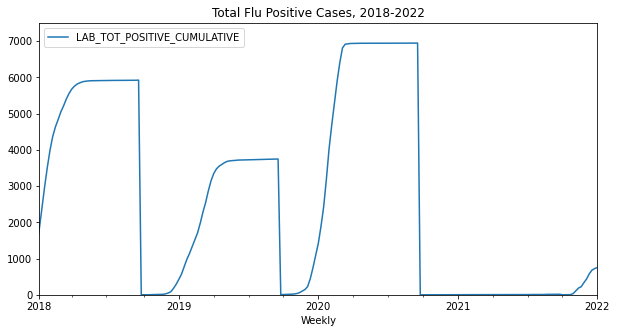

In [8]:
## This first plot shows weekly trend of lab positive influenza results from 2018-2022.

total.plot(title = 'Total Flu Positive Cases, 2018-2022', y = ['LAB_TOT_POSITIVE_CUMULATIVE'], xlim = ('2018','2022'), ylim = (0, 7500), figsize = (10,5) )

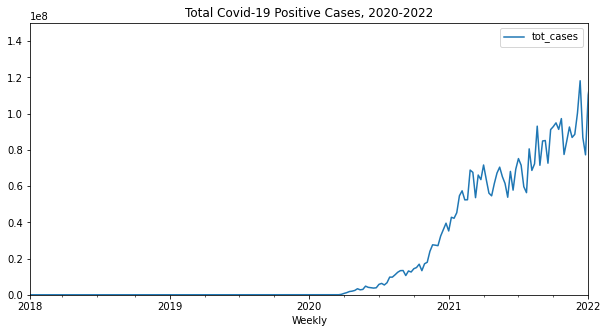

In [9]:
## Second plot shows the weekly trend of total covid-19 cases from 2018-2022.

total.plot(title = 'Total Covid-19 Positive Cases, 2020-2022', y = ['tot_cases'], xlim = ('2018','2022'), ylim = (0, 150000000), figsize = (10,5))

## Discussion 1:

Initially, we can see our flu trend for each year is pretty predictable, and not maxing out past 7000-7500 cases per year. This is a sizeable number, however looking at the total covid-19 data, total cases peaked around late 2021, nearly 1.2 million cases.

Now we can compare and filter some of this data, to give us a deeper look.

## Goal 2:

The next goal is to filter the data, such that, there is only data from when covid-19 and the influenza had simutaneous records of cases. In this case, it means plotting on, or after, rows with the date of 2020-01-15. I will then plot both of the values for weekly amount of new cases.

For the plot, a simple line plot was chose to show the trend, the best. There are two views of the same graph here, to show difference in significance. I, also, want to calculate the average amount of new cases, of each virus, per week.

Average weekly amount of new pos. cases for flu = 72.1
Average weekly amount of new pos. cases for covid-19 = 180782.5
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


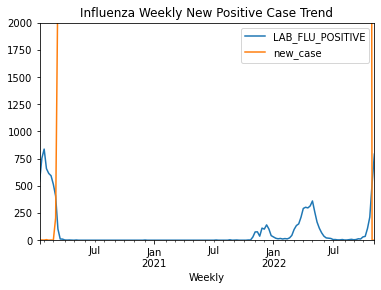

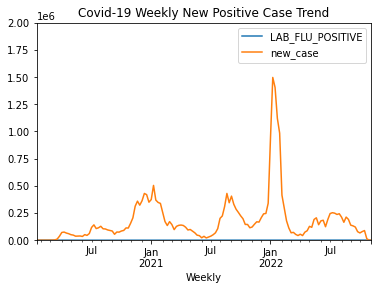

In [10]:
## Filtering out the data to get only the data of when the first positive U.S. covid case was seen, and onward.
## Aggregating the data, to get the mean of new positive cases for both flu and covid, each week.
## These averages have been printed, after transforming the data to a string and combining with another string.
## Plotting these two values over the course of the filtered years, two different graphs to show the difference in scale.

total_sick = total[total.index >= '2020-01-15']

print('Average weekly amount of new pos. cases for flu = ' + str(round(total_sick['LAB_FLU_POSITIVE'].mean(), 1)))
print('Average weekly amount of new pos. cases for covid-19 = ' + str(round(total_sick['new_case'].mean(), 1)))

print(total_sick.plot(title = 'Influenza Weekly New Positive Case Trend', y = ['LAB_FLU_POSITIVE', 'new_case'], ylim = (0, 2000)))
print(total_sick.plot(title = 'Covid-19 Weekly New Positive Case Trend', y = ['LAB_FLU_POSITIVE', 'new_case'], ylim = (0, 2000000)))

## Discussion 2:

It is clear that from the surface level, covid-19 had much more of an impact, regarding new positive rates seen. However, there was a bit of a dip in influenza positivity in early 2022, when covid-19 was still emerging and at its peak. This could be some indication that some influenza cases were false positive covid-19 cases. 

Now that we have a basic understanding of all the data and have begun to compare the values, let's take an even deeper look at the seasonality and how an increasing risk affects the mortality rate that is observed.

## Goal 3:

The last goal of this project will be to look into how impactful each virus really was and continues to be. We are doing this by pivoting the flu table so the index is the year, the columns are the influenza risk level for each year, and the values are a sum of all the ICU Hospitalizations due to influenza each year, and for given season. Filling the NaN values with 0 as a personal choice in filling missing values. 

Then, I will name the 'Weekly' column (index) of the covid table to 'Yearly', and group this data by year. Next, I am going to concatenate both these new dataframes, to get one new dataframe with a column for covid-19 deaths for each year, and our influenza ICU hospitalization data.

Lastly, I will use a bar chart to plot these, to show their respective values, and the difference in size amongst them. I, also, want to calculate the sums of these respective values.

In [11]:
## Pivoting the flu table such that the index is by year, columns are based upon the risk of influenza.
## Values are a sum of patients in the ICU due to influenza.
## Resetting 'Weekly' index, to get workable column, renaming it 'Yearly'.
## Grouping the covid data by year, and summing all values.

flu_yearly = flu.pivot_table(values ='HOSP_FLU_ICU_WEEKLY', 
                index = 'INFLUENZA_SEASON', 
                columns ='FLU_RISK_LEVEL', 
                aggfunc = 'sum', 
                fill_value = 0)

covid_rename = covid.reset_index().rename(columns = {'Weekly' : 'Yearly'})
covid_yearly = covid_rename.groupby([pd.Grouper(key='Yearly', freq='Y')])['new_death'].sum()

In [12]:
## Putting both of my new dfs in a list, concat them to add both together.
## Renaming new column of data, 'COVID DEATHS'.
## Filling Missing Values with 0.

dfs = [flu_yearly, covid_yearly] 
mortality = pd.concat(dfs)

mortality.rename(columns = {0 : 'COVID DEATHS'}, inplace = True)
mortality.fillna(0, inplace = True)

Total new ICU hospitalizations for flu, during high season, from 2015-2022 = 1221.0
Total new ICU hospitalizations for flu, during low season, from 2015-2022 = 122.0


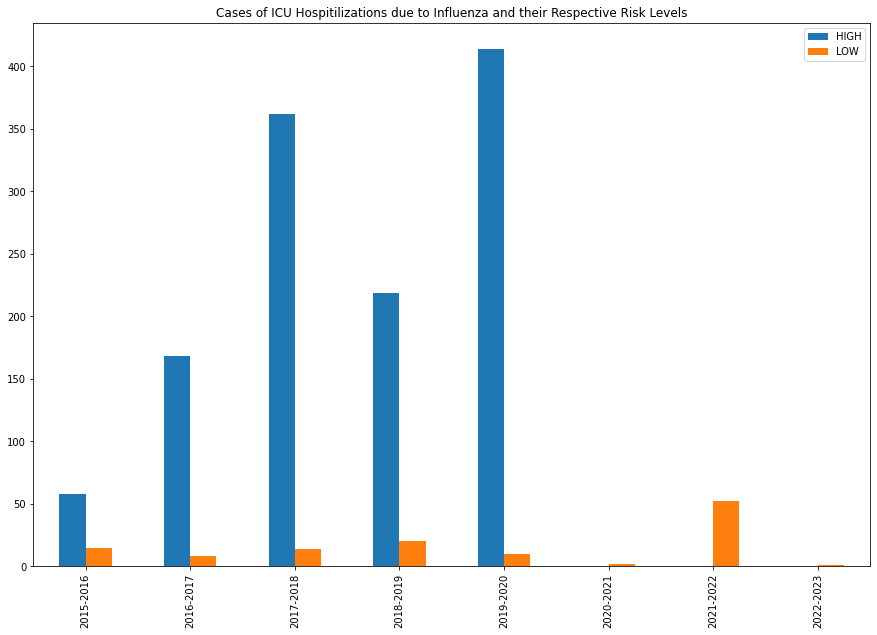

In [13]:
## Setting our df against a filter, to get only the data on influenza ICU hospitalizations.
## Plotting just the influenza data to get a grasp on the level of activity normally seen.
## Printing the total number of ICU hosp. during respective risk during seasons, from 2015-2022.

mfilt1 = mortality[mortality.index != datetime(2020,12,31)]
mfilt2 = mfilt1[mfilt1.index != datetime(2021,12,31)]
mfilt3 = mfilt2[mfilt2.index != datetime(2022,12,31)]

mfilt3.plot.bar(title = 'Cases of ICU Hospitilizations due to Influenza and their Respective Risk Levels', y = ['HIGH','LOW'], figsize = (15,10))

print('Total new ICU hospitalizations for flu, during high season, from 2015-2022 = ' + str(round(mortality['HIGH'].sum(), 1)))
print('Total new ICU hospitalizations for flu, during low season, from 2015-2022 = ' + str(round(mortality['LOW'].sum(), 1)))

## Discussion 3:

In this first graph, we can see the numbers for ICU hospitalizations, nationwide, in blue during the 'high' influenza risk level. This tops out right around 400-425 ICU patients during that period. Interesting to note that, that same value occurs in the 2019-2020 year, which was also when we started noticing covid-19 reports. With this being said, some values for the last two years during the 'high' risk portion of the year, were not available from the CDC.

The orange is indicative of the 'low' season ICU patients seen for influenza, for that given year. This value reaches its max in 2021-2022.

Now we are going to look at the data all together, to see the vast difference in how impactful each is.

Total deaths due to covid-19 from 2020-2022 = 310503.0


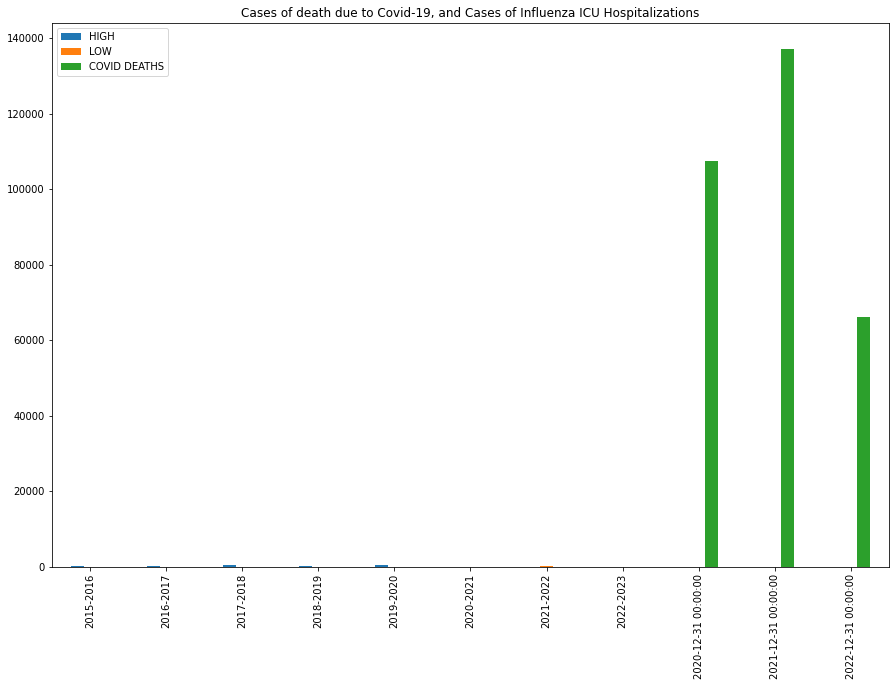

In [14]:
mortality.plot.bar(title = 'Cases of death due to Covid-19, and Cases of Influenza ICU Hospitalizations', y = ['HIGH','LOW', 'COVID DEATHS'], figsize = (15,10))
print('Total deaths due to covid-19 from 2020-2022 = ' + str(round(mortality['COVID DEATHS'].sum(), 1)))

## Discussion 4:

Above is a bar chart that is a combination of influenza data regarding hospital ICU patients during 'high' and 'low' risk seasons, for the year, from 2015-2022. Coupled this with data of covid-19 deaths, with a few years overlapping from 2020-2022. 

There is a vast difference in these two values, as shown. It is clear that covid-19 was more impactful than inflenza has been, over the years. The rate of deaths due to covid-19 over 3 years is exponentially higher than the rate patients that are seen in the ICU for influenza over a longer period of time.

## Conclusions:

Looking at all of our data it is acceptable to say that covid-19 was a far more impactful virus than influenza has been in a much shorter period of time. This virus has sadly been the cause of death of over 310,000 individuals compared to influenza sending 1,221 individuals to the intensive care unit, both values being nationally. It should continue to be taken seriously, with cautions in place to keep people healthy and safe.

Regarding the flu, it is also a threat, particularly when we are in a 'high' risk level period of time. In the last couple of years, we have averaged 72 new cases of the flu each week.

Both viral infections are important to keep learning about and to keep discovering new insights of. Hopefully, through this project and others, we are able to come to a fuller understanding of each.